# Analysis

The WeRateDogs twitter user rates dogs on a scale of 1-10, often with ratings over 10. Here we will look at if there is an underlying bias both in ratings, and public response to posts, depending on the breed or type of dog.

We will first take a look at this graphically.

### Graphical

In [1]:
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)
import pandas as pd
import matplotlib.pyplot as plt
% matplotlib inline
% config InlineBackend.figure_format = 'retina'

df = pd.read_csv('twitter_archive_master.csv')

We will be using neural network predictions on the images to get the dog breed, with this there may be some error which is unavoidable without manually classifying each dog. We will look at the top 20 most common dogs.

#### Ratings

Firstly here are the distributions of ratings by dog breed.

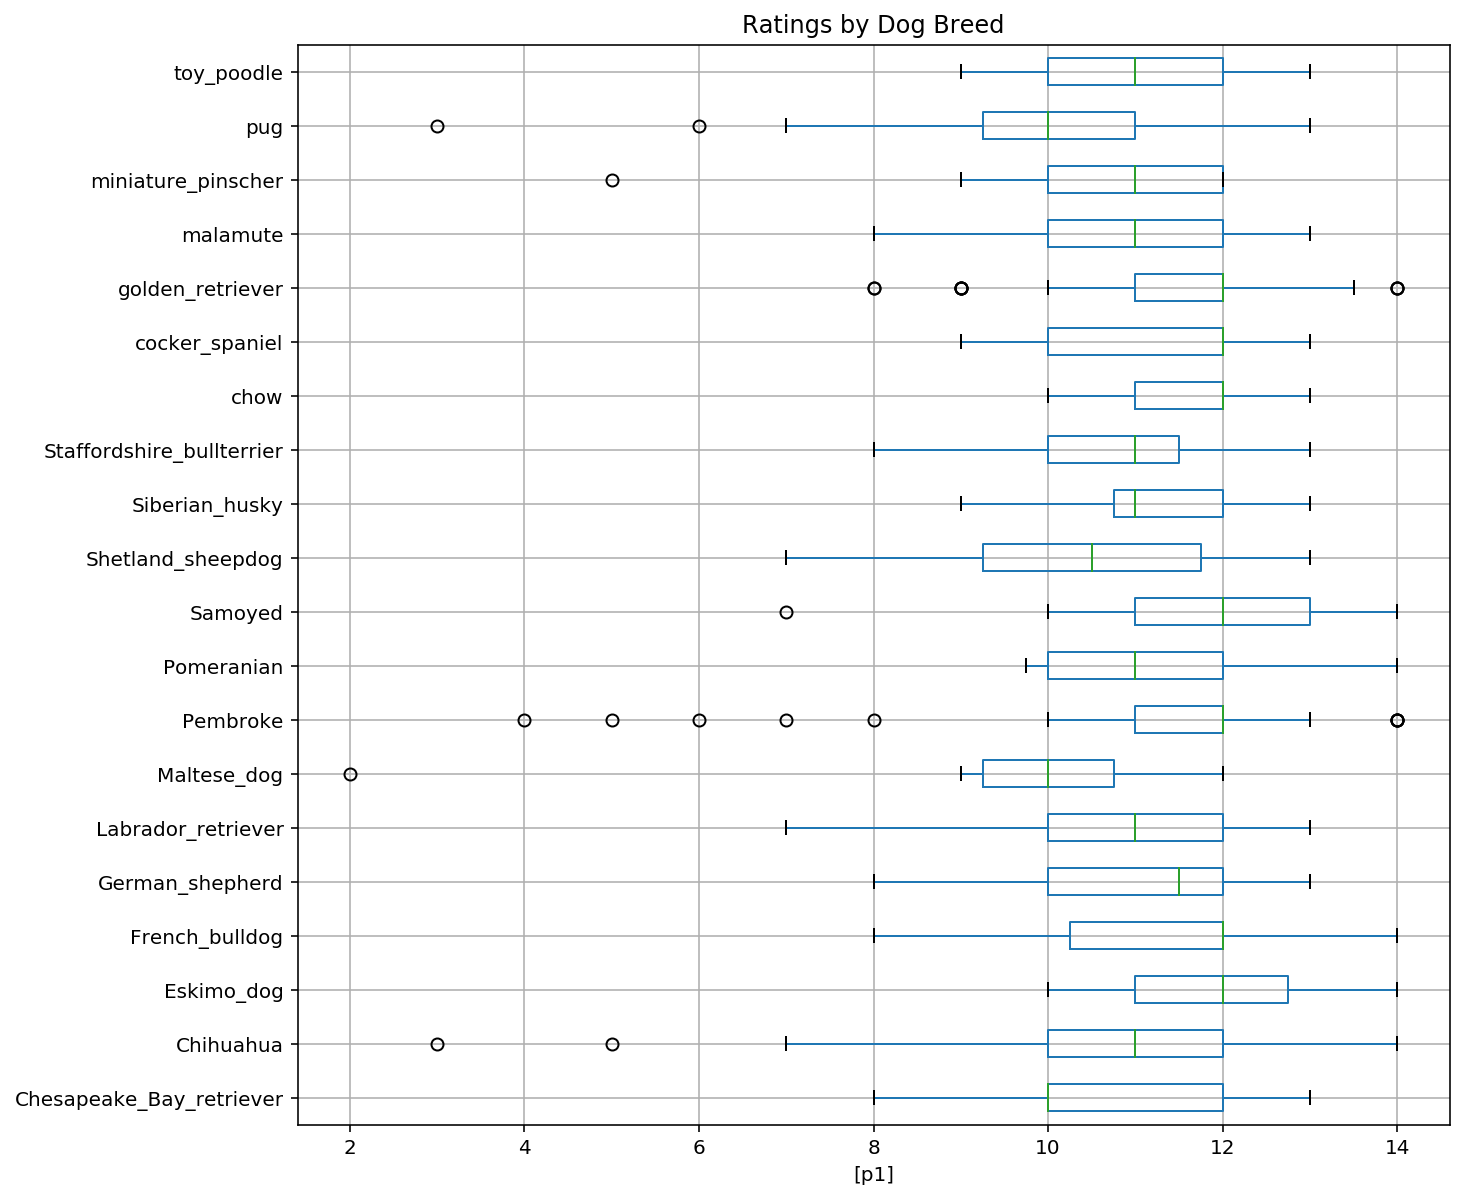

In [2]:
common_dogs = df.loc[df['p1_dog'] == True, 'p1'].value_counts()\
    .sort_values().tail(20).keys()
common_dogs = df[df['p1'].isin(common_dogs)]
common_dogs[['p1', 'rating']].boxplot(by='p1', vert = False, 
                                      figsize = (10,10))
plt.title('Ratings by Dog Breed')
plt.suptitle('');

As seen there are no particularly outstanding dog breeds with all but two of the interquartile ranges falling between 10 and 12. By eye, samoyeds are highly rated whereas maltese are lower rated.

And here are the ratings by dog type.

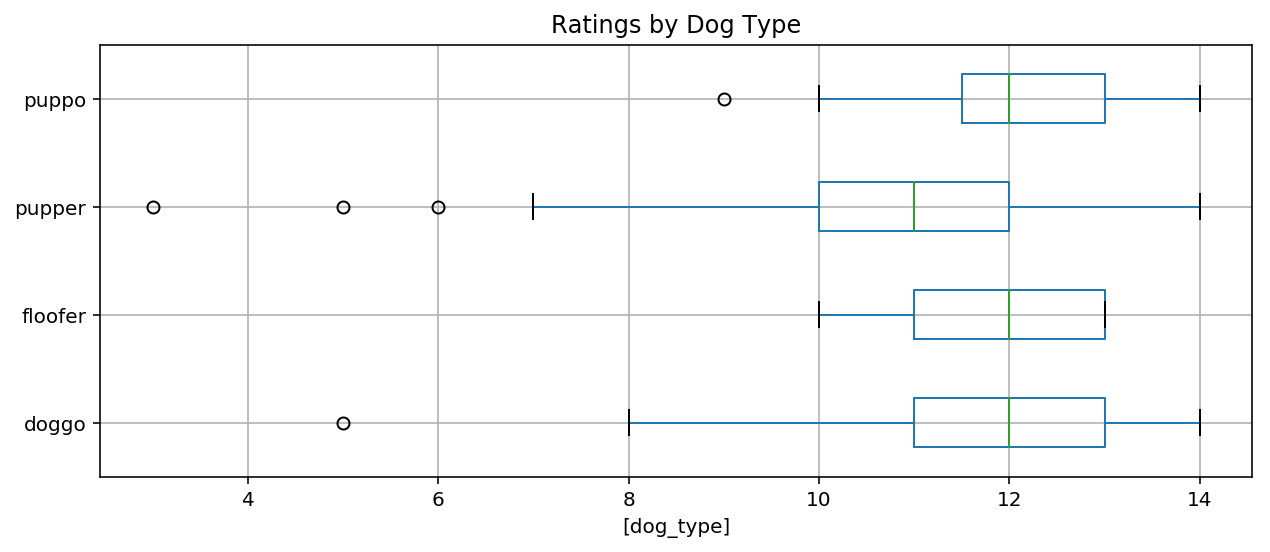

In [3]:
df[['dog_type', 'rating']].boxplot(by='dog_type', vert = False, 
                                            figsize = (10,4));
plt.title('Ratings by Dog Type')
plt.suptitle('');

Here we see puppos tend to perform best.

#### Retweets

To measure public responsiveness to different dog breeds and types we will look at retweets.

Firstly here are the distributions of retweets by dog breed.

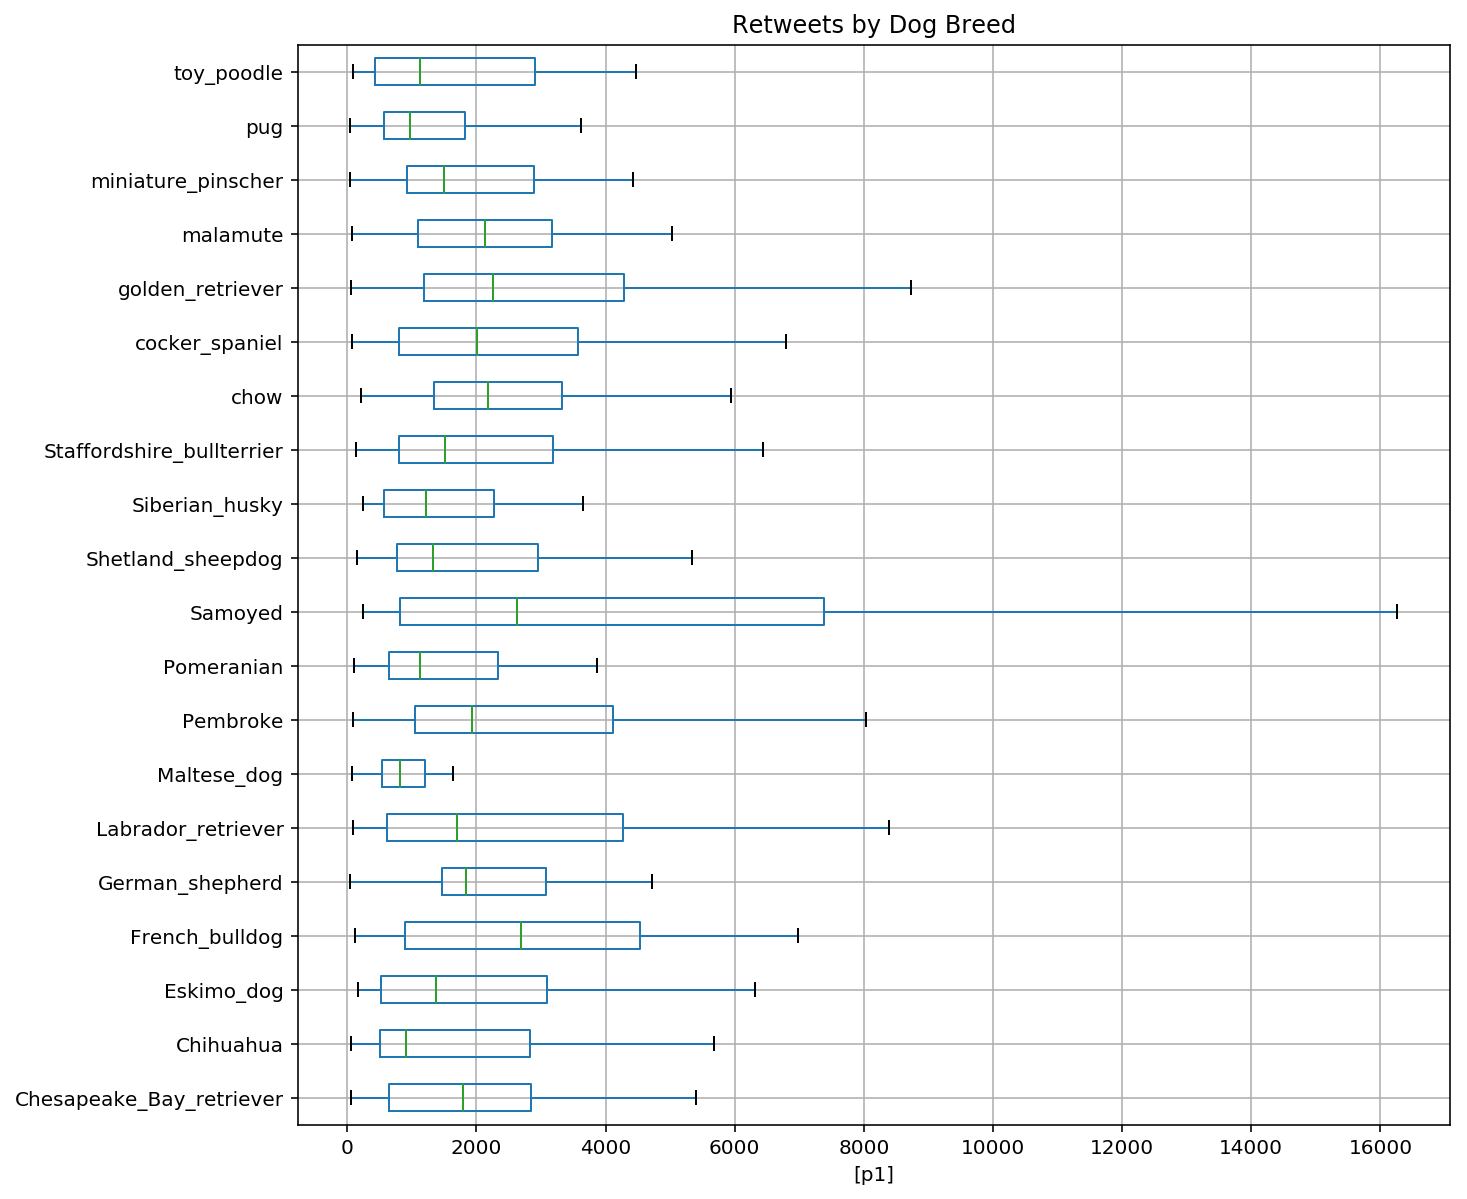

In [4]:
common_dogs[['p1', 'retweet_count']].boxplot(by='p1', vert = False, 
                                             figsize = (10,10), showfliers = False);
plt.title('Retweets by Dog Breed')
plt.suptitle('');

Maltese dogs seem to have the least public engagement, whereas samoyeds have high engagement.

And here are the retweets by dog type

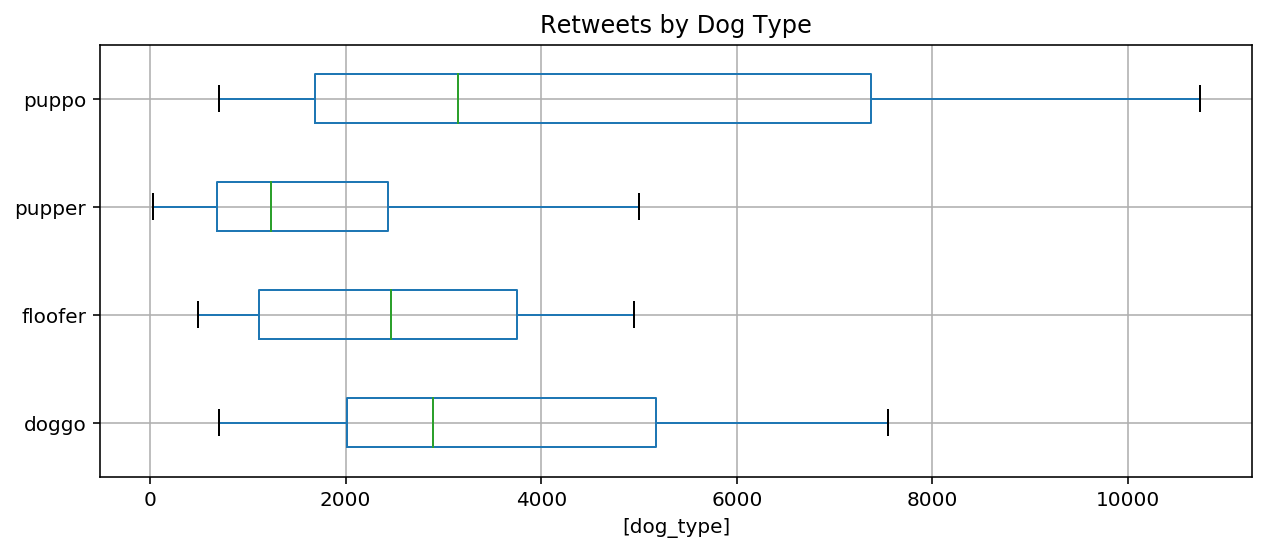

In [5]:
df[['dog_type', 'retweet_count']].boxplot(by='dog_type', vert = False, 
                                          figsize = (10,4), showfliers = False);
plt.title('Retweets by Dog Type')
plt.suptitle('');

Puppos again seem to outperform the other dog types.

### Statistical Test

We will now perform an one-way analysis of variance (ANOVA) test to test the hypothesis that these ratings and retweets come from the same population.

#### Rating

In [6]:
import scipy.stats as stats
F, p = stats.f_oneway(df[df['dog_type'] == 'puppo']['rating'],
                      df[df['dog_type'] == 'pupper']['rating'],
                      df[df['dog_type'] == 'floofer']['rating'],
                      df[df['dog_type'] == 'doggo']['rating'])
F, p

(11.245814948857124, 4.7976802197785166e-07)

This shows a statistical significance in different population means.

In [7]:
F, p = stats.f_oneway(common_dogs[common_dogs['p1'] == 'Pembroke']['rating'],
                      common_dogs[common_dogs['p1'] == 'German_shepherd']['rating'],
                      common_dogs[common_dogs['p1'] == 'Labrador_retriever']['rating'],
                      common_dogs[common_dogs['p1'] == 'Chihuahua']['rating'],
                      common_dogs[common_dogs['p1'] == 'golden_retriever']['rating'],
                      common_dogs[common_dogs['p1'] == 'Pomeranian']['rating'],
                      common_dogs[common_dogs['p1'] == 'Staffordshire_bullterrier']['rating'],
                      common_dogs[common_dogs['p1'] == 'Siberian_husky']['rating'],
                      common_dogs[common_dogs['p1'] == 'cocker_spaniel']['rating'],
                      common_dogs[common_dogs['p1'] == 'Chesapeake_Bay_retriever']['rating'],
                      common_dogs[common_dogs['p1'] == 'Eskimo_dog']['rating'],
                      common_dogs[common_dogs['p1'] == 'chow']['rating'],
                      common_dogs[common_dogs['p1'] == 'Samoyed']['rating'],
                      common_dogs[common_dogs['p1'] == 'French_bulldog']['rating'],
                      common_dogs[common_dogs['p1'] == 'Shetland_sheepdog']['rating'],
                      common_dogs[common_dogs['p1'] == 'toy_poodle']['rating'],
                      common_dogs[common_dogs['p1'] == 'pug']['rating'],
                      common_dogs[common_dogs['p1'] == 'malamute']['rating'],
                      common_dogs[common_dogs['p1'] == 'miniature_pinscher']['rating'],
                      common_dogs[common_dogs['p1'] == 'Maltese_dog']['rating'])
F, p

(4.5751056118266202, 4.6235644169731e-10)

Again here is an even more significant difference in population means.

#### Retweets

In [8]:
F, p = stats.f_oneway(df[df['dog_type'] == 'puppo']['retweet_count'],
                      df[df['dog_type'] == 'pupper']['retweet_count'],
                      df[df['dog_type'] == 'floofer']['retweet_count'],
                      df[df['dog_type'] == 'doggo']['retweet_count'])
F, p

(7.5921755001545135, 6.3316187279855186e-05)

This shows a statistical significance in different population means.

In [9]:
F, p = stats.f_oneway(common_dogs[common_dogs['p1'] == 'Pembroke']['retweet_count'],
                      common_dogs[common_dogs['p1'] == 'German_shepherd']['retweet_count'],
                      common_dogs[common_dogs['p1'] == 'Labrador_retriever']['retweet_count'],
                      common_dogs[common_dogs['p1'] == 'Chihuahua']['retweet_count'],
                      common_dogs[common_dogs['p1'] == 'golden_retriever']['retweet_count'],
                      common_dogs[common_dogs['p1'] == 'Pomeranian']['retweet_count'],
                      common_dogs[common_dogs['p1'] == 'Staffordshire_bullterrier']['retweet_count'],
                      common_dogs[common_dogs['p1'] == 'Siberian_husky']['retweet_count'],
                      common_dogs[common_dogs['p1'] == 'cocker_spaniel']['retweet_count'],
                      common_dogs[common_dogs['p1'] == 'Chesapeake_Bay_retriever']['retweet_count'],
                      common_dogs[common_dogs['p1'] == 'Eskimo_dog']['retweet_count'],
                      common_dogs[common_dogs['p1'] == 'chow']['retweet_count'],
                      common_dogs[common_dogs['p1'] == 'Samoyed']['retweet_count'],
                      common_dogs[common_dogs['p1'] == 'French_bulldog']['retweet_count'],
                      common_dogs[common_dogs['p1'] == 'Shetland_sheepdog']['retweet_count'],
                      common_dogs[common_dogs['p1'] == 'toy_poodle']['retweet_count'],
                      common_dogs[common_dogs['p1'] == 'pug']['retweet_count'],
                      common_dogs[common_dogs['p1'] == 'malamute']['retweet_count'],
                      common_dogs[common_dogs['p1'] == 'miniature_pinscher']['retweet_count'],
                      common_dogs[common_dogs['p1'] == 'Maltese_dog']['retweet_count'])
F, p

(1.0371045822612295, 0.41448089303272789)

Here interestingly there is no statistically significant difference in means, meaning public interaction is not dependent on dog breed.

In summary the WeRateDogs ratings are dependent on dog breed and type, at least over one of each category.
The audience interaction is dependent only on dog type, not dog breed.